<a href="https://colab.research.google.com/github/RMoulla/PTSCV/blob/main/TP_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploration et entraînement d'embeddings Word2Vec avec Gensim**
Dans ce TP, nous allons explorer les embeddings de mots en deux étapes. Dans un premier temps, nous utiliserons un modèle Word2Vec pré-entraîné afin de comprendre comment les relations sémantiques entre les mots sont capturées. Nous analyserons des similarités, des analogies, et visualiserons ces relations dans l'espace vectoriel. Ensuite, dans la seconde partie, nous allons entraîner notre propre modèle Word2Vec sur le corpus Reuters, un ensemble d'articles économiques et financiers. L'objectif est de comprendre le processus d'entraînement d'un modèle Word2Vec et de comparer les relations sémantiques et analogiques obtenues avec un corpus spécifique. À travers ces deux étapes, nous développerons une compréhension pratique des embeddings de mots et de leur utilité dans des tâches de traitement du langage naturel.

## Outils :
* **Python**
* **Gensim** pour Word2Vec
* **NLTK** pour le corpus Reuters
* **Matplotlib** pour les visualisations

---

## **Partie 1 : Explorer un modèle Word2Vec pré-entraîné (Gensim)**
Dans cette partie, nous allons utiliser un modèle Word2Vec déjà pré-entraîné pour explorer des similarités et des relations sémantiques entre les mots.

**Étape 1** : Charger un modèle Word2Vec pré-entraîné
Nous allons utiliser le modèle Google News Word2Vec, qui a été entraîné sur une vaste collection de textes issus de Google News (environ 100 milliards de mots).

In [ ]:
!pip install -q gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 58.4 MB/s eta 0:00:00


In [ ]:
import gensim.downloader as api

# Charger le modèle pré-entraîné Google News Word2Vec
model = api.load('word2vec-google-news-300')

# Vérifier la taille du vocabulaire
print(f"Vocabulaire du modèle : {len(model.key_to_index)} mots")


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vocabulaire du modèle : 3000000 mots


**Étape 2** : Explorer des similarités entre les mots

In [ ]:
# Trouver les mots les plus similaires à "king"
similar_words = model.most_similar('king')
print(similar_words)


[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]


In [ ]:
# Effectuer des analogies
analogy = model.most_similar(positive=['woman', 'king'], negative=['man'])
print(analogy)


[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411403656006)]


In [ ]:
analogy = model.most_similar(positive=['woman', 'doctor'], negative=['man'])
print(analogy)

[('gynecologist', 0.7093892097473145), ('nurse', 0.6477287411689758), ('doctors', 0.6471460461616516), ('physician', 0.6438996195793152), ('pediatrician', 0.6249487996101379), ('nurse_practitioner', 0.6218312978744507), ('obstetrician', 0.6072014570236206), ('ob_gyn', 0.5986713171005249), ('midwife', 0.5927062630653381), ('dermatologist', 0.5739566683769226)]


**Étape 3** : Visualisation des embeddings

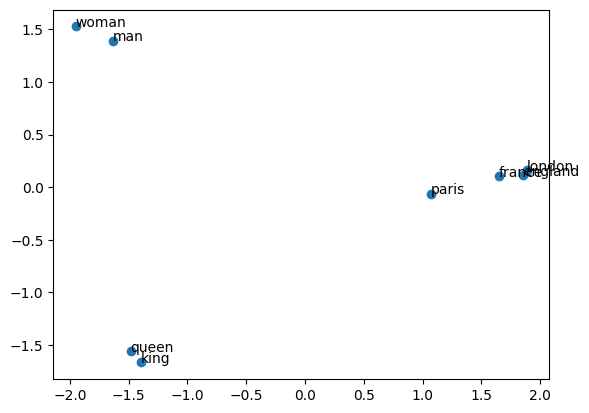

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sélectionner des mots pour visualiser leurs embeddings
words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'london', 'england']
embeddings = [model[word] for word in words]

# Réduction de dimension à 2D avec PCA
pca = PCA(n_components=2)
result = pca.fit_transform(embeddings)

# Visualisation des points
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


## **Partie 2 : Entraîner un modèle Word2Vec sur le corpus Reuters**

Dans cette partie, vous allez entraîner votre propre modèle Word2Vec en utilisant le corpus Reuters disponible dans NLTK.

**Étape 1** : Chargement des données.


In [ ]:
import nltk
from nltk.corpus import reuters

# Télécharger et charger le corpus
nltk.download('reuters')

# Exemple de texte du corpus
corpus = [reuters.raw(fileid) for fileid in reuters.fileids()]

# Visualiser un text
print(corpus[0])

[nltk_data] Downloading package reuters to /root/nltk_data...


ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict would hurt
  them in the long-run, in the short-term Tokyo's loss might be
  their gain.
      The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
      Unofficial Japanese estimates put the impact of the tariffs
  at 10 billion dlrs and spokesmen for major electronics firms
  said they would virtually halt exports

### Reconnaissance d'entités nommées dans une dépêche

In [ ]:
import spacy

# Charger le modèle anglais
nlp = spacy.load("en_core_web_sm")

# Effectuer de la reconnaissance d'entités nommées (NER) sur le premier texte du corpus
doc = nlp(corpus[0])

# Afficher les entités trouvées
for ent in doc.ents:
    print(ent.text, ":", ent.label_)


ASIAN : CARDINAL
U.S. : GPE
Japan : GPE
Asia : LOC
Reuter : ORG
Asian : NORP
U.S. : GPE
Japan : GPE
U.S. : GPE
American : NORP
Tokyo : GPE
U.S. : GPE
300 : CARDINAL
Japanese : NORP
April 17 : DATE
Japan : GPE
Unofficial : ORG
Japanese : NORP
10 billion : MONEY
Japanese : NORP
Matsushita Electric
  Industrial Co Ltd & : ORG
a few months : DATE
U.S. : GPE
Tom
  Murtha : PERSON
Tokyo : GPE
Taiwan : GPE
U.S. : GPE
Japan : GPE
Taiwanese : NORP
Taiwan : GPE
15.6 billion : CARDINAL
last
  year : DATE
95 : CARDINAL
U.S. : GPE
Taiwan : GPE
53 billion : CARDINAL
U.S. Products : ORG
U.S. Retaliation : ORG
Paul Sheen : PERSON
textile exporters &lt;Taiwan Safe Group> : ORG
South Korea's : GPE
U.S. : GPE
Japan : GPE
South Korea : GPE
Japan : GPE
Last year : DATE
South Korea : GPE
7.1 billion
  dlrs : QUANTITY
U.S. : GPE
4.9 billion : CARDINAL
1985 : DATE
Malaysia : GPE
Japan : GPE
third : ORDINAL
U.S. : GPE
Hong Kong : GPE
Japan : GPE
U.S. : GPE
Lawrence Mills : PERSON
the Federation of Hong Kong In

 **Etape 2 **: Prétraiter les données.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

# Prétraitement des documents
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

processed_corpus = [preprocess_text(text) for text in corpus]

# Compter le nombre total de tokens dans tout le corpus
total_tokens = sum(len(tokens) for tokens in processed_corpus)

# Afficher le nombre total de tokens
print(f"Nombre total de tokens dans le corpus Reuters : {total_tokens}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Nombre total de tokens dans le corpus Reuters : 839812


**Etape 3** : Entraîner un modèle Word2Vec.

In [ ]:
from gensim.models import Word2Vec

# Entraînement du modèle Word2Vec
model = Word2Vec(processed_corpus, vector_size=100, window=5, min_count=5, sg=0)

**Etape 4** : Trouver des analogies sémantiques.

In [ ]:
similar_words = model.wv.most_similar('energy')
print(similar_words)

[('arturo', 0.7720606327056885), ('petroleum', 0.7652445435523987), ('fernando', 0.7468380928039551), ('hernandez', 0.6962424516677856), ('defense', 0.6913488507270813), ('industry', 0.686626136302948), ('valero', 0.6815446019172668), ('espinosa', 0.6809387803077698), ('grisanti', 0.6757853031158447), ('santos', 0.6739153861999512)]
